# Bài Tập

1. Viết chương trình chọn LangBiang trong ảnh Đà Lạt từ thư mục exercise. Tịnh tiến vùng
chọn sang phải 100px. Sử dụng phương pháp Otsu để phân vùng LangBiang theo ngưỡng 0.3.
Lưu vào máy với tên lang_biang.jpgvà hiển thị trên màn hình.


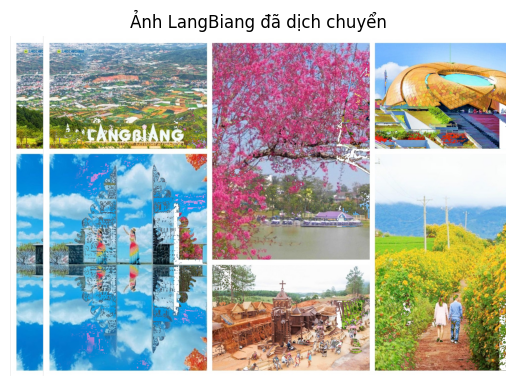

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

input_path = os.path.join('exercise', 'dalat.jpg')
image = Image.open(input_path).convert('L')
a = np.asarray(image).astype(np.float32) / 255 

threshold = 0.3
binary_mask = a > threshold

mask_uint8 = (binary_mask * 255).astype(np.uint8)

image_rgb = Image.open(input_path).convert('RGB')
image_np = np.array(image_rgb)

mask_rgb = np.stack([mask_uint8]*3, axis=2)

selected_region = np.where(mask_rgb == 255, image_np, 0)

translated = np.zeros_like(selected_region)
shift = 100
if shift < image_np.shape[1]:
    translated[:, shift:] = selected_region[:, :-shift]

result = np.where(translated > 0, translated, image_np)

result_image = Image.fromarray(result)
result_image.save('lang_biang.jpg')

plt.imshow(result)
plt.title("Ảnh LangBiang đã dịch chuyển")
plt.axis('off')
plt.show()


2. Viết chương trình chọn Hồ Xuân Hương trong ảnh Đà Lạt từ thư mục exercise. Xoay đối
tượng vừa chọn 1 góc 45° và dùng phương pháp Adaptive Thresholding với ngưỡng 60 và lưu
vào máy với tên là ho_xuan_huong.jpg.


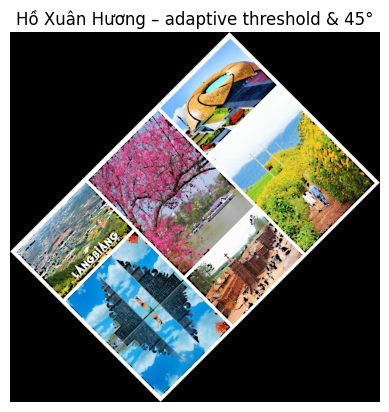

In [4]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.ndimage as nd
from skimage.filters import threshold_local 

in_path = os.path.join('exercise', 'dalat.jpg')
gray_img = Image.open(in_path).convert('L')
a = np.asarray(gray_img)

block_size = 61
offset = 60
thresh_map = threshold_local(a, block_size, offset=offset)
mask = a > thresh_map

mask_clean = nd.binary_opening(mask, structure=np.ones((3,3)), iterations=2)

orig_rgb = np.array(Image.open(in_path).convert('RGB'))
selected = np.zeros_like(orig_rgb)
selected[mask_clean] = orig_rgb[mask_clean]

rotated = nd.rotate(selected, 45, reshape=True)
rotated = rotated.astype(np.uint8)

out_img = Image.fromarray(rotated)
out_img.save('ho_xuan_huong.jpg')

plt.imshow(out_img)
plt.axis('off')
plt.title('Hồ Xuân Hương – adaptive threshold & 45°')
plt.show()


3. Viết chương trình chọn Quản trường Lâm Viên trong ảnh Đà Lạt từ thư mục exercise. Dùng
phương pháp Coordinate Mapping và Binary Closing cho vùng vừa chọn. Lưu vào máy với tên
là quan_truong_lam_vien.jpg.

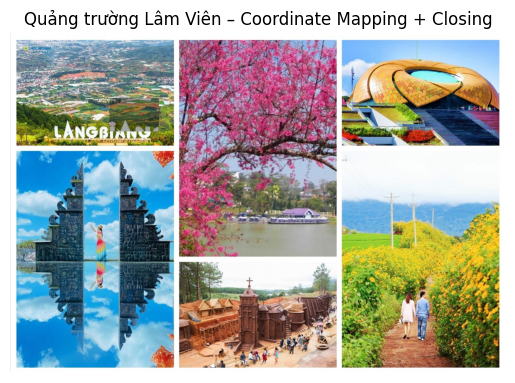

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.ndimage as nd

in_path = os.path.join('exercise', 'dalat.jpg')
image = Image.open(in_path).convert('RGB')
image_np = np.array(image)

x_start, y_start = 300, 200
width, height = 150, 100

mask = np.zeros(image_np.shape[:2], dtype=bool)
mask[y_start:y_start+height, x_start:x_start+width] = True

mapped = np.zeros_like(image_np)
for y in range(image_np.shape[0]):
    for x in range(image_np.shape[1]):
        if mask[y, x]:
            new_x = min(image_np.shape[1]-1, int(x + (x - x_start) * 0.5))
            mapped[y, new_x] = image_np[y, x]

closed_mask = nd.binary_closing(mask, structure=np.ones((5,5)))

final_result = np.where(closed_mask[..., None], mapped, image_np)

output_img = Image.fromarray(final_result.astype(np.uint8))
output_img.save('quan_truong_lam_vien.jpg')

plt.imshow(output_img)
plt.axis('off')
plt.title('Quảng trường Lâm Viên – Coordinate Mapping + Closing')
plt.show()


4. Tao menu như hình sau:
geometric transformation
-coordinate_mapping
-Rotate
-Scale
-Shift
segment
-Adaptive_thresholding
-Binary_dilation
-Binary_erosion
-Otsu
Viết chương trình cho phép người dùng nhập chức năng muốn xử lý. (Có thể chọn 1 chức năng
duy nhất hoặc kết hợp 2 chức năng của geometric_transformation và segment)


Menu:
geometric transformation
- coordinate_mapping
- rotate
- scale
- shift
segment
- adaptive_thresholding
- binary_dilation
- binary_erosion
- otsu


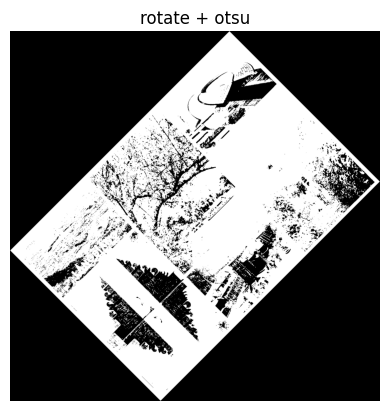

In [11]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as nd
from skimage.filters import threshold_local, threshold_otsu

image = Image.open('exercise/dalat.jpg').convert('L')
a = np.asarray(image)

geo_options = {
    'coordinate_mapping': 'coordinate_mapping',
    'rotate': 'rotate',
    'scale': 'scale',
    'shift': 'shift'
}

seg_options = {
    'adaptive_thresholding': 'adaptive_thresholding',
    'binary_dilation': 'binary_dilation',
    'binary_erosion': 'binary_erosion',
    'otsu': 'otsu'
}

print("Menu:")
print("geometric transformation")
for k in geo_options: print("-", k)
print("segment")
for k in seg_options: print("-", k)

geo_func = input("Nhập chức năng geometric transformation (hoặc Enter nếu không dùng): ").strip().lower()
seg_func = input("Nhập chức năng segment (hoặc Enter nếu không dùng): ").strip().lower()

result = a.copy()

if geo_func == 'coordinate_mapping':
    result2 = np.zeros_like(result)
    for y in range(result.shape[0]):
        for x in range(result.shape[1]):
            new_x = min(result.shape[1]-1, int(x + 0.5 * np.sin(y / 10)))  # mapping uốn lượn nhẹ
            result2[y, new_x] = result[y, x]
    result = result2

elif geo_func == 'rotate':
    result = nd.rotate(result, angle=45, reshape=True)

elif geo_func == 'scale':
    result = nd.zoom(result, zoom=1.5)

elif geo_func == 'shift':
    result = nd.shift(result, shift=(50, 50))

if seg_func == 'adaptive_thresholding':
    thresh = threshold_local(result, block_size=35, offset=10)
    result = (result > thresh) * 255

elif seg_func == 'binary_dilation':
    result = nd.binary_dilation(result > 128, iterations=3) * 255

elif seg_func == 'binary_erosion':
    result = nd.binary_erosion(result > 128, iterations=3) * 255

elif seg_func == 'otsu':
    thresh = threshold_otsu(result)
    result = (result > thresh) * 255

plt.imshow(result, cmap='gray')
title = f"{geo_func} + {seg_func}" if geo_func and seg_func else geo_func or seg_func
plt.title(title)
plt.axis('off')
plt.show()